In [ ]:
# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [2]:
auto_numeric = pd.read_csv('datasets/train_auto_numeric.csv')
print('Points, Attributes = {}'.format(auto_numeric.shape))

Points, Attributes = (159, 16)


### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [3]:
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [4]:
auto_numeric.describe() # all attributes are numeric

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

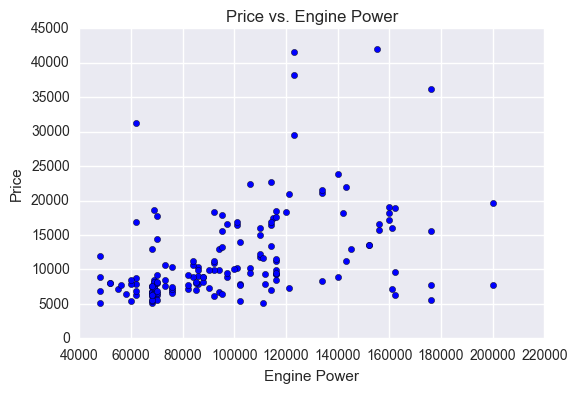

In [5]:
plt.figure()
plt.scatter(auto_numeric['engine-power'], auto_numeric['price'])
plt.xlabel('Engine Power')
plt.ylabel('Price')
plt.title('Price vs. Engine Power')
plt.show()

### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

The engine-power alone does not seem to be enough to predict the price. It appears that there is a positive correlation between the two values, but prices vary widely at all price levels. It also appears that as the engine-power increases, there are fewer data points from which to draw price values, and the variance of price increases significantly, making it more difficult to predict in this range. Finally, there appears to be what could be an outlier at an engine-power of 60,000, as its price is far higher than anything else under 120,000.

### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

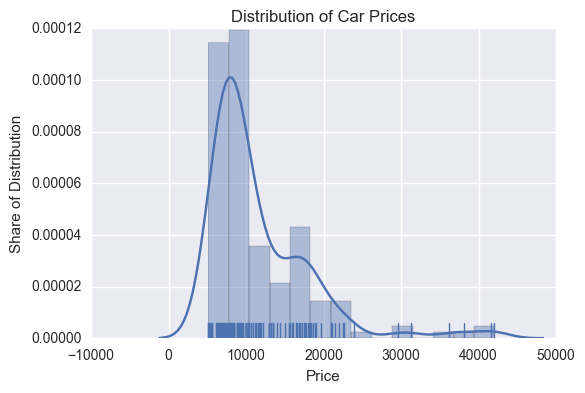

In [8]:
sns.distplot(auto_numeric['price'], rug = True) # automatically uses Freedman-Diaconis Rule to pick bin size
plt.xlabel('Price')
plt.ylabel('Share of Distribution')
plt.title('Distribution of Car Prices')
plt.show()

### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

One way to preprocess this data in order to improve the performance of linear regression would be to apply a transformation, such as the natural logarithm, to the price data; this would make the outliers to the far right of the distribution less statistically significant, while making the distribution more even and "well-behaved" as a whole.

### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [9]:
X = auto_numeric['engine-power']
y = auto_numeric['price']

### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [10]:
print('X shape before: {}'.format(X.shape))
X = np.matrix(X).transpose()
print('X shape after: {}'.format(X.shape))

X shape before: (159,)
X shape after: (159, 1)


### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [12]:
lr = LinearRegression(normalize = True).fit(X_train, y_train)

### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [13]:
print(lr.coef_)

[ 0.08988389]


Equation is price = 0.08988389 \* engine-power, or y = 08988389 \* x

### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

When one unit of engine-power is added, the price goes up by 0.08988389. It is not possible to tell from the magnitude of this value alone whether engine-power is an important influential variable with regard to the price, since this is also dependent on the respective magnitudes and ranges of the two in the dataset. For example, if engine-power is typically greater than price by an order of magnitude or more, and covers a wide range in its values (both of which appear to be true from the plot above), then the net increase in price across the range of engines could be relatively significant.

### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

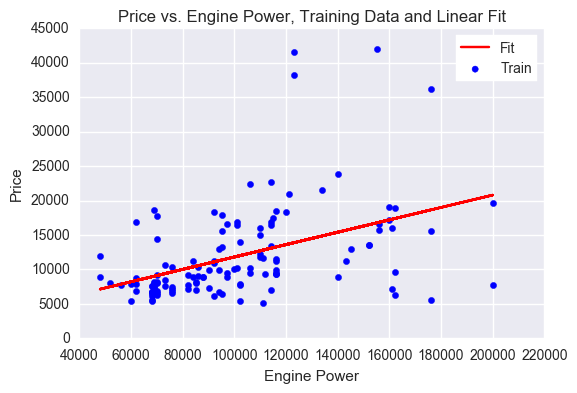

In [14]:
fig, ax = plt.subplots()
plt.scatter(X_train, y_train, color = 'b', label = 'Train')
# plt.scatter(X_train, lr.predict(X_train), color = 'g', label = 'Predictions')
# ^ not sure if this is what "show the predictions" means, since they all fall exactly on the regression line
plt.plot(X_train, lr.predict(X_train), color = 'r', label = 'Fit')
plt.xlabel('Engine Power')
plt.ylabel('Price')
plt.title('Price vs. Engine Power, Training Data and Linear Fit')
ax.legend(frameon = True).get_frame().set_facecolor('w')
plt.show()

### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

With hold-out validation, the fit of our model and its performance on testing data are determined by how the data is randomly split into these two sets, so any significant variation between them arising from random sampling will be accentuated, whereas k-fold validation helps to "even out" this phenomenon by looking at multiple divisions of the data. This disadvantage is especially pronounced with small datasets, since each individual point has a larger effect on the fit and score, causing the data to be "rougher," worsened by the holding out of some portion of test data.

### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [15]:
kf = KFold(len(X), n_folds = 5, shuffle = True, random_state = 0)

### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [16]:
for i, (training, testing) in enumerate(kf):
    print('Mean price for training group {}: {}'.format(i, np.mean(y[training])))

Mean price for training group 0: 11853.2677165
Mean price for training group 1: 11635.976378
Mean price for training group 2: 11689.8740157
Mean price for training group 3: 11709.8267717
Mean price for training group 4: 11535.84375


### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [17]:
cvp = cross_val_predict(LinearRegression(normalize = True), X, y, kf)
print('CVP dimensionality: {}'.format(cvp.shape))
print('y-vector dimensionality: {}'.format(y.shape))

CVP dimensionality: (159,)
y-vector dimensionality: (159,)


### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [18]:
# 1 - \sum_i (y_i - f(x_i))^2 / \sum_i (y_i - \mu)^2
print('R^2: {}'.format(1 - ((y - cvp) ** 2).sum() / ((y - np.mean(y)) ** 2).sum()))
# \sqrt{\sum_i (f(x_i) - y_i)^2 / n}
print('RMSE: {}'.format(np.sqrt(((cvp - y) ** 2).mean())))
# \sum_i |f(x_i) - y_i| / n
print('MAE: {}'.format((cvp - y).abs().mean()))
print('CC: {}'.format(np.corrcoef(y, cvp)[0][1]))

R^2: 0.173005270976
RMSE: 6114.45211862
MAE: 3987.95779619
CC: 0.417122199043


### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

These metrics intend to measure how well the regression on engine-power is able to fit the given data on price. The RMSE and MAE are measures of error between the actual prices and their predicted values from the input engine-power data, so the closer they are to zero (their minimum value), the better the fit is. The RMSE strongly penalizes outliers by squaring each difference between predicted and actual price, whereas the MAE simply measures the average distance between the predicted and actual price, so it's accordingly a lower value. These are very high in comparison to most prices, with these error metrics actually being greater than some prices, suggesting that the engine-power may not be a very strong predictor for price. CC instead measures how strong the correlation between actual and predicted prices is, ranging between -1 and 1 for perfect negative to perfect positive correlation. A good fit should a value close to 1, since perfect prediction yields perfect correlation, but CC is not particularly high here, again suggesting that engine-power is not a very good predictor of price. R^2 measures how well our model predicts change in price from change in engine-power, with 0 being no prediction and 1 being full prediction; its similarly low value reflects poor prediction.

Before, simply looking at the regressed slope of price vs. engine-power, we were unable to make a firm decision about the predictive power of engine-power for price, since the magnitude of slope is entirely dependent on the respective magnitudes of the two variables. We could look at the scatter plot and make a judgment that a 0.08988389 increase in price per unit power over the length of the x-axis would not be as large as the spread of prices, and intuitively see that there doesn't seem to be much correlation between the two, but the value of the slope alone tells us very little. These metrics, on the other hand, capture how our fit performs, with clear baselines to compare to (0 for error, 1 for correlation).

### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

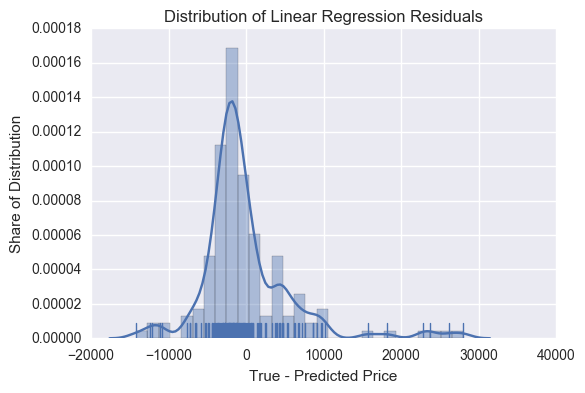

In [19]:
sns.distplot(y - cvp, rug = True) # automatically uses Freedman-Diaconis Rule to pick bin size
plt.xlabel('True - Predicted Price')
plt.ylabel('Share of Distribution')
plt.title('Distribution of Linear Regression Residuals')
plt.show()

This distribution is close to what I'd expect. With regression, we'd like to assume that our residuals are normally distributed, and this histogram comes close to a well-behaved Gaussian. However, the mean appears to be noticeably lower than 0, suggesting that our model more consistently overshoots the actual price than undershoots it. This may be offset somewhat by the comparitively longer tail to the right of the mean than to the left.


### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [20]:
auto_base = pd.read_csv('datasets/train_auto_base.csv')
X = np.matrix(auto_base['engine-power']).transpose()
y = auto_base['price']

cvp = cross_val_predict(LinearRegression(normalize = True), X, y, kf)

# 1 - \sum_i (y_i - f(x_i))^2 / \sum_i (y_i - \mu)^2
print('R^2: {}'.format(1 - ((y - cvp) ** 2).sum() / ((y - np.mean(y)) ** 2).sum()))
# \sqrt{\sum_i (f(x_i) - y_i)^2 / n}
print('RMSE: {}'.format(np.sqrt(((cvp - y) ** 2).mean())))
# \sum_i |f(x_i) - y_i| / n
print('MAE: {}'.format((cvp - y).abs().mean()))
print('CC: {}'.format(np.corrcoef(y, cvp)[0][1]))

R^2: -0.00213595381121
RMSE: 6730.84360395
MAE: 4901.86096203
CC: -0.0619144160589


### ========== Question 1.23 ==========
Show a scatter plot of predicted vs. true price and another one of predicted price vs. engine-power. Use a single plot with two subplots. Label axes appropriately.

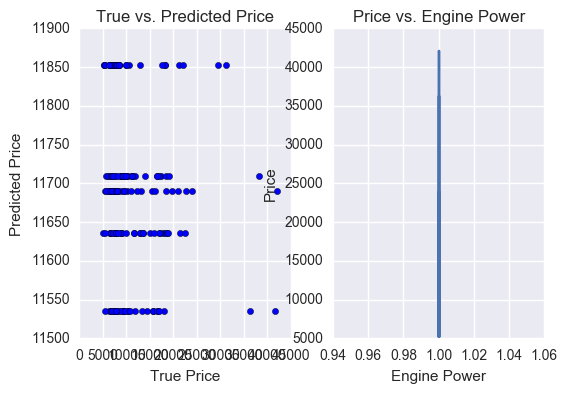

In [21]:
plt.subplot(121)
plt.scatter(y, cvp)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True vs. Predicted Price')

plt.subplot(122)
plt.plot(X, y)
plt.xlabel('Engine Power')
plt.ylabel('Price')
plt.title('Price vs. Engine Power')
plt.show()

### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

The simplest baseline model for linear regression is to assume that the independent variable has no impact on the dependent variable. The regression model I have just built reflects this, as all values of engine-power are exactly the same and equal to 1.0, such that the regression should arrive at a constant value of y for each training set. This is visible in the five distinct bands of predicted price, each resulting from one of the five training sets used in the k-fold CV iterator. The predictions of this model are perfectly justified given the input data, as with no variation in the independent variable, the regression should degenerate to the mean of the dependent variable.

### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [22]:
auto_base.describe()

,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


As one can see from the auto_base dataset's statistics, all values of engine-power are 1.0, so a linear regression model cannot associate any change in price with a change in engine-power. Instead, it will arrive at a constant horizontal line equal to the mean of price. Because we used a k-fold CV iterator, each training set had a slightly different mean, but from the plots above it is clear that they are all close to the cumulative mean of 11684.723270. The wider the spread in price, RMSE and MAE will increase, and the R^2 and CC will decrease, with the former becoming negative due to slightly larger variation between the actual values and k-fold means than with the cumulative mean, and the latter becoming negative due to some k-fold means being slightly less than the cumulative mean.

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

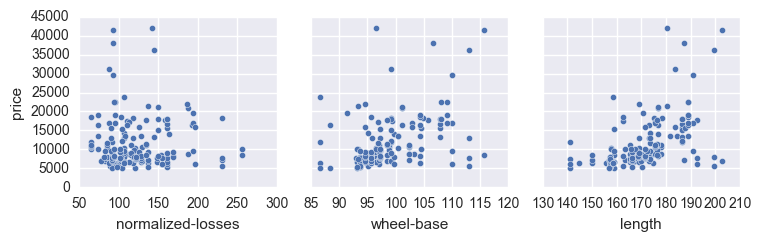

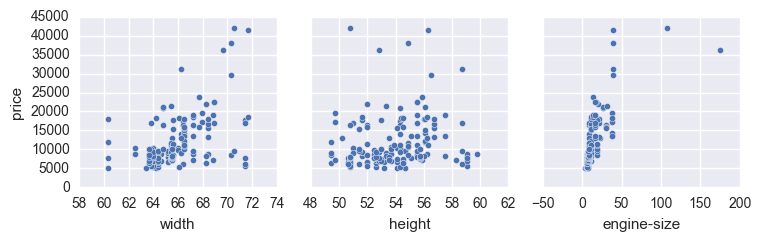

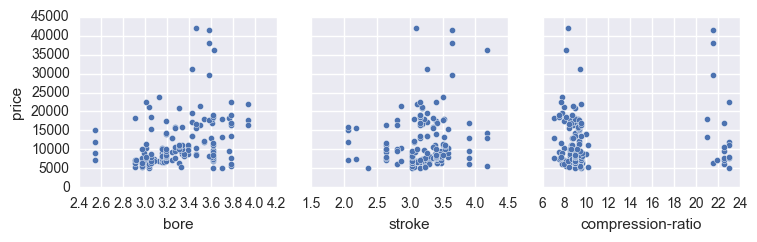

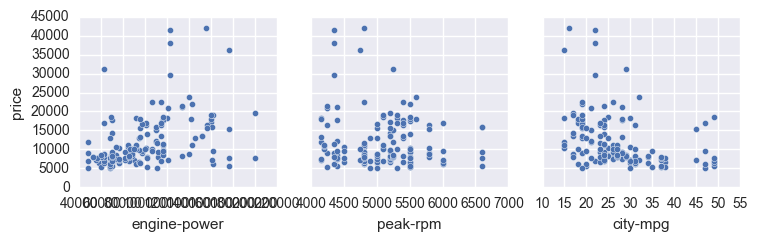

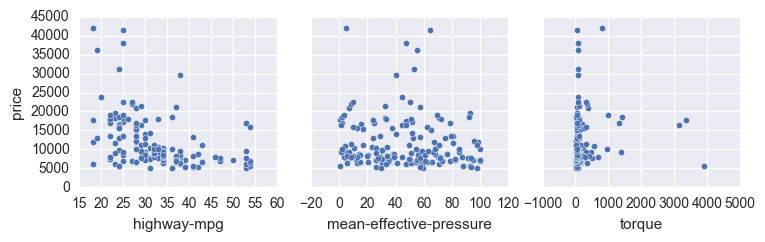

In [23]:
cols = auto_numeric.drop('price', axis = 1).columns
for i in xrange(0, len(cols), 3):
    sns.pairplot(auto_numeric, x_vars = cols[i : i + 3], y_vars = ['price'])
    plt.show()

engine-size, compression-ratio, and torque all seem pretty useless at predicting the price, as they consist of spikes cutting across all price ranges, centered on one or two values of the independent variable. mean-effective-pressure also seems to have a relatively flat distribution of price across its range, so it is also unlikely to contribute much.

length and width both appear to have noticeable positive correlations with price, which should make them good predictors. Most others appear to have some degree of positive or negative correlation.

I suspect that the first four attributes I mentioned above could be safely removed without having a significant effect on the performance of the regression. The extreme clustering of engine-size and torque would likely worsen the regression's fit, as they have wild variations in price across a short run, making a slope hard to fit and likel over-dependent on the far outliers. compression-ratio, on the other hand, seems to have similar mean values for price at its two spikes on opposite ends of the axis, so it would likely end up with a coefficient close to zero anyway. I expect the same to be true of mean-effective-pressure, since there doesn't seem to be any obvious trend in price.

### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [109]:
X = auto_numeric.drop('price', axis = 1)
y = auto_numeric['price']
cvp = cross_val_predict(LinearRegression(normalize = True), X, y, kf)

(159, 15)


### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [25]:
# 1 - \sum_i (y_i - f(x_i))^2 / \sum_i (y_i - \mu)^2
print('R^2: {}'.format(1 - ((y - cvp) ** 2).sum() / ((y - np.mean(y)) ** 2).sum()))
# \sqrt{\sum_i (f(x_i) - y_i)^2 / n}
print('RMSE: {}'.format(np.sqrt(((cvp - y) ** 2).mean())))
# \sum_i |f(x_i) - y_i| / n
print('MAE: {}'.format((cvp - y).abs().mean()))
print('CC: {}'.format(np.corrcoef(y, cvp)[0][1]))

R^2: 0.486137984457
RMSE: 4819.80464283
MAE: 3050.34459963
CC: 0.742560270537


### ========== Question 2.4 ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

The RMSE and MAE error metrics are smaller than in the simple regression on engine-power, though only by about 30-40%. However, the CC (and R^2) correlation metric is much higher, indicating without a doubt that this multivariate regression does a much better job of accurately predicting price.

### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

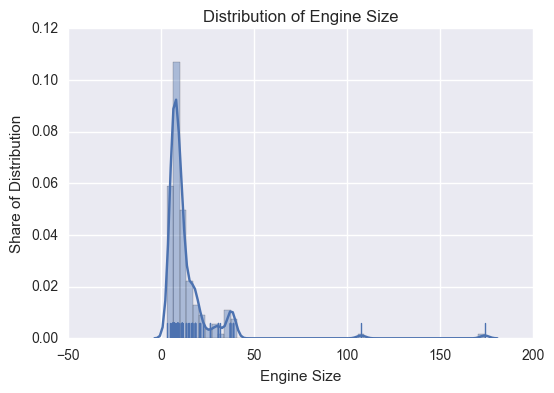

In [26]:
sns.distplot(auto_numeric['engine-size'], rug = True) # automatically uses Freedman-Diaconis Rule to pick bin size
plt.xlabel('Engine Size')
plt.ylabel('Share of Distribution')
plt.title('Distribution of Engine Size')
plt.show()

### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

Yes, this distribution is expected to cause a problem for regression, as the cluster of points near the origin won't be able to provide a good fit for the long-term trend between price and engine-size, so the far outliers will have a disproportionate effect on the slope. The presence of these outliers may also mask the presence of any discernible trends present in the cluster near the origin. We can partially alleviate this by taking the log of engine size, moving the outliers much closer to the rest of the data, thus shrinking its overall x-range and allowing for a finer-grained model of price on engine-size.

### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

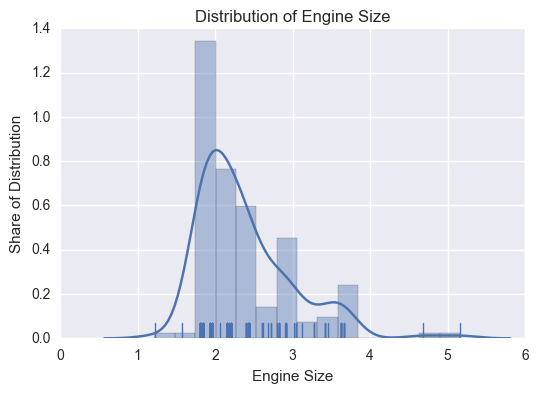

In [27]:
sns.distplot(np.log(auto_numeric['engine-size']), rug = True) # automatically uses Freedman-Diaconis Rule to pick bin size
plt.xlabel('Engine Size')
plt.ylabel('Share of Distribution')
plt.title('Distribution of Engine Size')
plt.show()

### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [28]:
trans_auto_numeric = auto_numeric.copy(deep = True)
trans_auto_numeric['engine-size'] = auto_numeric['engine-size'].apply(lambda x: np.log(x))

X = trans_auto_numeric.drop('price', axis = 1)
y = trans_auto_numeric['price']
cvp = cross_val_predict(LinearRegression(normalize = True), X, y, kf)

# 1 - \sum_i (y_i - f(x_i))^2 / \sum_i (y_i - \mu)^2
print('R^2: {}'.format(1 - ((y - cvp) ** 2).sum() / ((y - np.mean(y)) ** 2).sum()))
# \sqrt{\sum_i (f(x_i) - y_i)^2 / n}
print('RMSE: {}'.format(np.sqrt(((cvp - y) ** 2).mean())))
# \sum_i |f(x_i) - y_i| / n
print('MAE: {}'.format((cvp - y).abs().mean()))
print('CC: {}'.format(np.corrcoef(y, cvp)[0][1]))

R^2: 0.689612268029
RMSE: 3745.91959756
MAE: 2668.36429567
CC: 0.831675321658


### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

With engine-size replaced by its logarithm, the performance of the model has noticeably improved. The CC metric is closer to 1 (representing perfect correlation between real and predicted values), while the RMSE and MAE error metrics have continued to shrink, albeit by a smaller percentage than when compared to regression on engine-power alone.

### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [117]:
pd.set_option('max_columns', 30)

In [118]:
auto_full = pd.read_csv('datasets/train_auto_full.csv')
print('Points, Attributes = {}'.format(auto_full.shape))
auto_full.head(20)

Points, Attributes = (159, 27)


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

The make, fuel-type, aspiration, body-style, drive-wheels, engine-location, engine-type, and fuel-system attributes are clearly categorical, as they are all nominal with no natural ordering. Additionally, while it's possible that the the num-of-doors, num-of-cylinders, and symboling attributes do have some positive correlation with price (representing "bigger," "powerful," and "premium" aspects of cars respectively), it may be better to tream them categorically given their discrete nature and the fact that other attributes capture these properties at least as well.

We cannot use the nominal attributes for linear regression because as strings, they do not have a representation on the real axis, and cannot be plugged into the system of linear equations relating them to the price, which is what linear regression attempts to optimize with regards to the error between fitted and observed data.

### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiriase yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [201]:
auto_full_edit = auto_full.copy(deep = True)
categorical = \
    ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', \
     'num-of-cylinders', 'fuel-system', 'symboling']
les = {}
for attr in categorical:
    le = LabelEncoder()
    auto_full_edit[attr] = le.fit_transform(auto_full_edit[attr])
    les[attr] = le
    
X_enc = auto_full_edit.drop('price', axis = 1)
ohe = OneHotEncoder(categorical_features = [attr in les for attr in X_enc.columns])
X_enc = ohe.fit_transform(X_enc)
    
print('Dimensionality of X_enc: {}'.format(X_enc.shape))

Dimensionality of X_enc: (159, 70)


### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [202]:
y = auto_full_edit['price']
kf = KFold(len(y), n_folds = 5, shuffle = True, random_state = 0)
cvp = cross_val_predict(LinearRegression(normalize = True), X_enc, y, kf)

# 1 - \sum_i (y_i - f(x_i))^2 / \sum_i (y_i - \mu)^2
print('R^2: {}'.format(1 - ((y - cvp) ** 2).sum() / ((y - np.mean(y)) ** 2).sum()))
# \sqrt{\sum_i (f(x_i) - y_i)^2 / n}
print('RMSE: {}'.format(np.sqrt(((cvp - y) ** 2).mean())))
# \sum_i |f(x_i) - y_i| / n
print('MAE: {}'.format((cvp - y).abs().mean()))
print('CC: {}'.format(np.corrcoef(y, cvp)[0][1]))

R^2: 0.871261986495
RMSE: 2412.45699035
MAE: 1662.8714744
CC: 0.937470085985


### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

This more complex model outperforms both the original multivariate linear regression in 2.3, as well as that in 2.8 with log-transformed engine-size values. The CC parameter has become even closer to 1, while RMSE and MAE are still signficant but again substantially smaller than previous values. Thus, one clear advantage of using the more complex model is improved performance, resulting from the ability to utilize categorical data that we previously could not use with linear regression. However, this comes at the cost of having to manually inspect and convert much of our input data to integer and then one-hot representations, which in turn prevents us from seeing how these attributes actually affect car price without reversing the labeling process.

### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. Has your performance improved? Explain your answer in 1-2 sentences.

In [205]:
print('Decision Tree Regressor - Numeric')
cvp = cross_val_predict(DecisionTreeRegressor(random_state = 0), X, y, kf)
# 1 - \sum_i (y_i - f(x_i))^2 / \sum_i (y_i - \mu)^2
print('R^2: {}'.format(1 - ((y - cvp) ** 2).sum() / ((y - np.mean(y)) ** 2).sum()))
# \sqrt{\sum_i (f(x_i) - y_i)^2 / n}
print('RMSE: {}'.format(np.sqrt(((cvp - y) ** 2).mean())))
# \sum_i |f(x_i) - y_i| / n
print('MAE: {}'.format((cvp - y).abs().mean()))
print('CC: {}'.format(np.corrcoef(y, cvp)[0][1]))

print()

print('Random Forest Regressor - Numeric')
cvp = cross_val_predict(RandomForestRegressor(random_state = 0), X, y, kf)
# 1 - \sum_i (y_i - f(x_i))^2 / \sum_i (y_i - \mu)^2
print('R^2: {}'.format(1 - ((y - cvp) ** 2).sum() / ((y - np.mean(y)) ** 2).sum()))
# \sqrt{\sum_i (f(x_i) - y_i)^2 / n}
print('RMSE: {}'.format(np.sqrt(((cvp - y) ** 2).mean())))
# \sum_i |f(x_i) - y_i| / n
print('MAE: {}'.format((cvp - y).abs().mean()))
print('CC: {}'.format(np.corrcoef(y, cvp)[0][1]))

print()

print('Decision Tree Regressor - Labeled, One-Hot')
cvp = cross_val_predict(DecisionTreeRegressor(random_state = 0), X_enc, y, kf)
# 1 - \sum_i (y_i - f(x_i))^2 / \sum_i (y_i - \mu)^2
print('R^2: {}'.format(1 - ((y - cvp) ** 2).sum() / ((y - np.mean(y)) ** 2).sum()))
# \sqrt{\sum_i (f(x_i) - y_i)^2 / n}
print('RMSE: {}'.format(np.sqrt(((cvp - y) ** 2).mean())))
# \sum_i |f(x_i) - y_i| / n
print('MAE: {}'.format((cvp - y).abs().mean()))
print('CC: {}'.format(np.corrcoef(y, cvp)[0][1]))

print()

print('Random Forest Regressor - Labeled, One-Hot')
cvp = cross_val_predict(RandomForestRegressor(random_state = 0), X_enc, y, kf)
# 1 - \sum_i (y_i - f(x_i))^2 / \sum_i (y_i - \mu)^2
print('R^2: {}'.format(1 - ((y - cvp) ** 2).sum() / ((y - np.mean(y)) ** 2).sum()))
# \sqrt{\sum_i (f(x_i) - y_i)^2 / n}
print('RMSE: {}'.format(np.sqrt(((cvp - y) ** 2).mean())))
# \sum_i |f(x_i) - y_i| / n
print('MAE: {}'.format((cvp - y).abs().mean()))
print('CC: {}'.format(np.corrcoef(y, cvp)[0][1]))

Decision Tree Regressor - Numeric
R^2: 0.685595876154
RMSE: 3770.07764463
MAE: 2594.20125786
CC: 0.844776843198

Random Forest Regressor - Numeric
R^2: 0.818357477727
RMSE: 2865.59585039
MAE: 1991.66226415
CC: 0.905074460368

Decision Tree Regressor - Labeled, One-Hot
R^2: 0.669283616279
RMSE: 3866.64261351
MAE: 2388.76100629
CC: 0.833490056431

Random Forest Regressor - Labeled, One-Hot
R^2: 0.828338839334
RMSE: 2785.75039008
MAE: 1826.46540881
CC: 0.913601730183


Despite the significant improvement in performance for multiple linear regression when we switched from all-numeric data to categorical data, tree-based regressors do not appear to experience the same benefit. With the random state for the regressors here set to a constant value, one can see that various metrics are slightly better or slightly worse for each regressor depending on which data is used. However, if the random state is allowed to fluctuate arbitrarily, these numbers drift past each other in either direction, leading me to believe that they perform more or less equivalently.